In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import missingno as msno
import re

%matplotlib inline

#Problem 1 (40%)



All external datasets can be found [here](https://github.com/Theosdoor/Data-Cleaning-and-Analysis-Coursework).

In [ ]:
# read from excel file
data = pd.read_excel("/content/drive/MyDrive/UNI/Computer Science/COMP2271 Data Science/Data Cleaning and Analysis Coursework/amazon_laptop_2023.xlsx", sheet_name = 0)
metadata = pd.read_excel("/content/drive/MyDrive/UNI/Computer Science/COMP2271 Data Science/Data Cleaning and Analysis Coursework/amazon_laptop_2023.xlsx", sheet_name = 1, header = None)

In [ ]:
data.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,HP,EliteBook 840,14 Inches,Silver,256 GB,Core i5 6200U,16 GB,Windows 10 Pro,Anti Glare Coating,Integrated,NaN,NaN,4.0,"$1,000.00"
1,Dell,Inspiron 15 3530,15.6 Inches,Black,2 TB,Core i7 Family,64 GB,Windows 11 Home,NaN,Integrated,Intel Iris Xe Graphics,NaN,4.2,"$1,000.00"
2,Dell,Vostro 3510 Laptop,15.6 Inches,Black,1000 GB,Core i7,32 GB,Windows 10 Home,Wifi & Bluetooth,Integrated,NaN,NaN,NaN,"$1,000.99"
3,Dell,Inspiron 7420 2-in-1,14 Inches,"Grey, Gray, Platinum Silver",2000 GB,Core i5,64 GB,Windows 11 Pro,NaN,Integrated,Intel Integrated Graphics,NaN,NaN,"$1,001.11"
4,MSI,Prestige 14Evo A11MO-217,14 Inches,Gary,NaN,Core i7,32 GB,Windows 10,"Anti-glare,Thin Bezel",Integrated,Intel Iris Xe Graphics,NaN,4.2,"$1,001.18"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


In [ ]:
# Drop columns that have all missing data
data.dropna(axis = 1, how = 'all')
data.dropna(axis = 0, how = 'all')
print(len(data.columns), len(data.values)) # no columns/rows dropped

14 4446


In [ ]:
## What categories absolutely essential for the research question?
# Model: we cannot recommend a laptop if we do not know the model.
# Price: generally an essential consdieration in recommending a laptop, regardless of user requirements.
## Remove all rows that have missing data in these categories.
data.dropna(subset=['model', 'price'], inplace = True)

<Axes: >

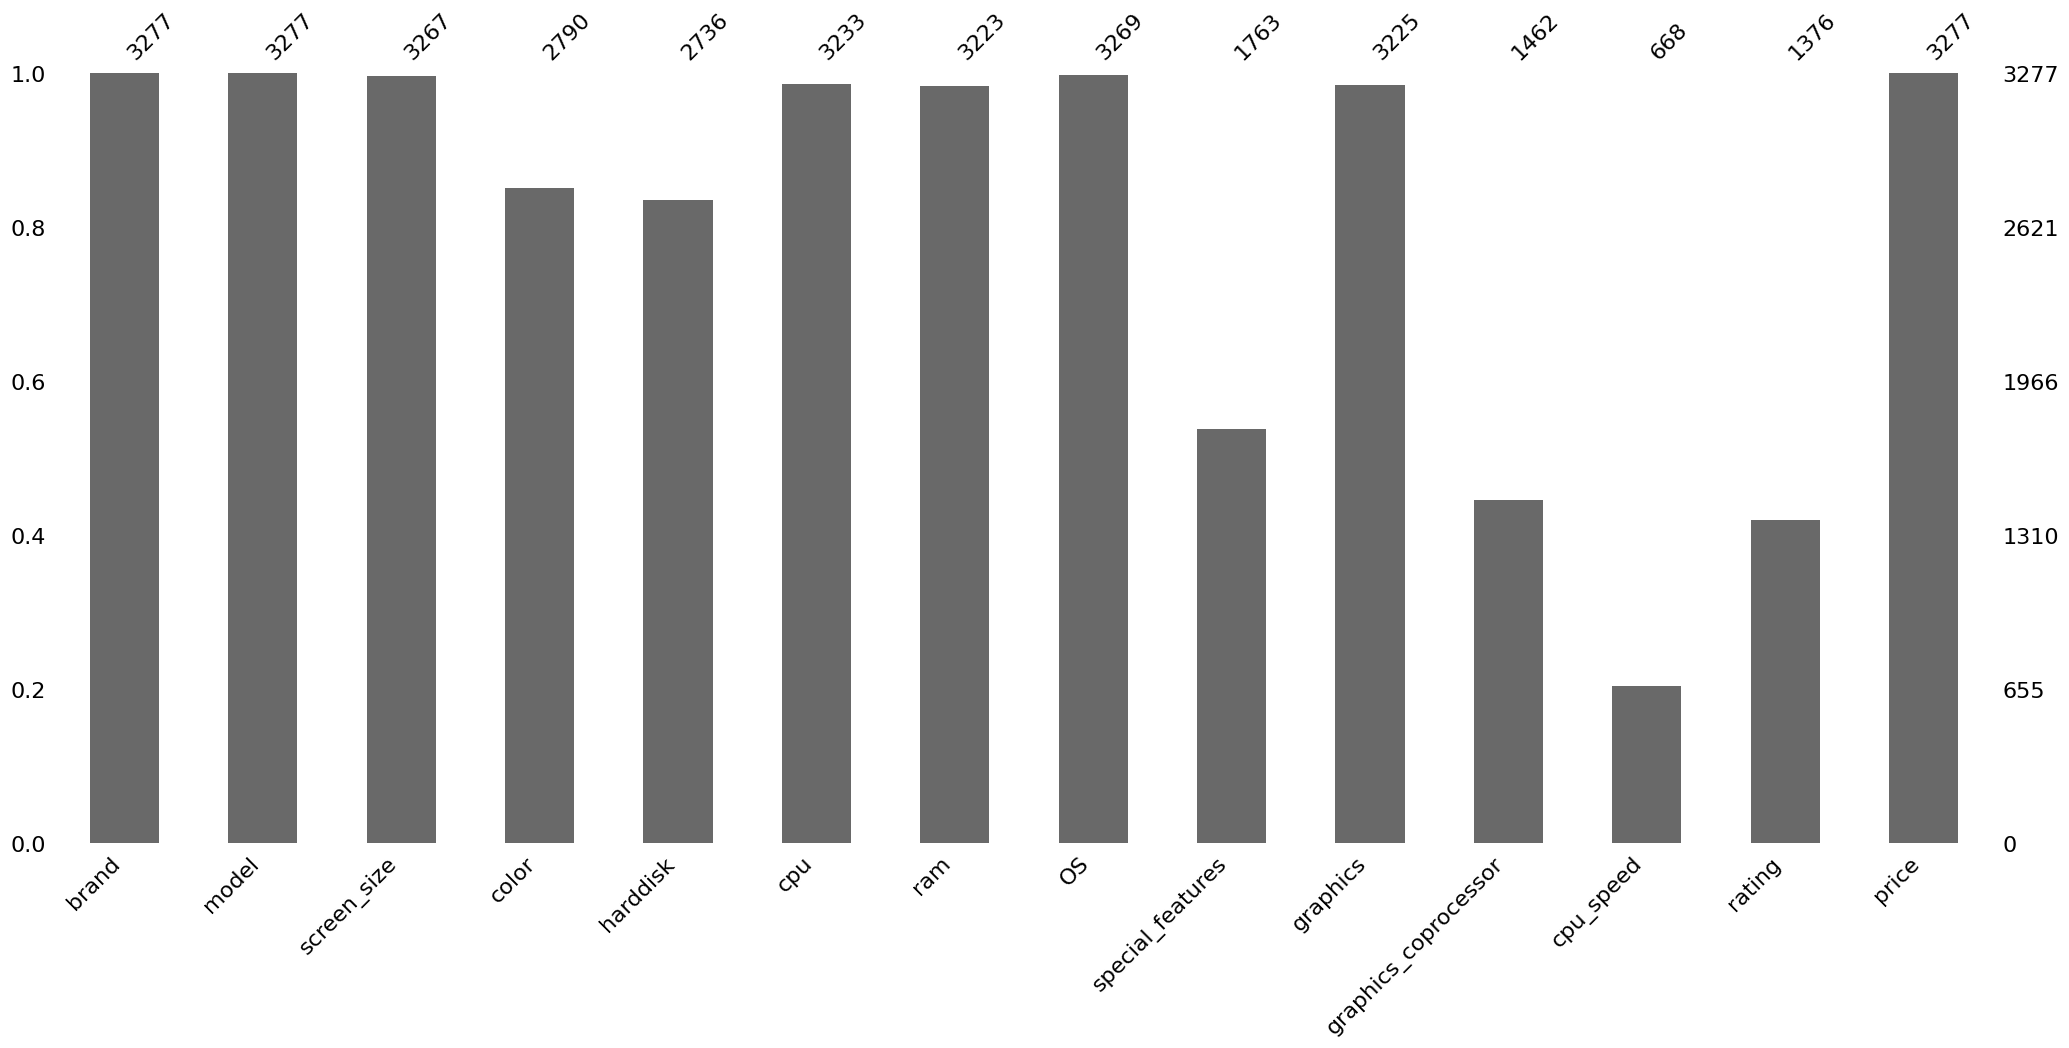

In [ ]:
msno.bar(data)

In [ ]:
## Missing lots of CPU speed data
# Intel core speeds from https://www.intel.com/content/www/us/en/support/articles/000028083/processors.html
core_speeds = pd.read_csv('https://raw.githubusercontent.com/Theosdoor/Data-Cleaning-and-Analysis-Coursework/main/Intel-Core-Comparsion.csv', na_values = 'N/A')
core_speeds = core_speeds[['Processor Number', 'Max Turbo Frequency']].dropna()

# Clean external dataset
external_dataset = core_speeds
for col in external_dataset.columns.tolist():
  external_dataset[col] = external_dataset[col].str.lower()

speed_re = re.compile(r'[0-9]+.[0-9]+[\s]*ghz')
external_dataset['Processor Number'] = external_dataset['Processor Number'].str.replace('-', ' ')
external_dataset[external_dataset.columns[1]] = external_dataset[external_dataset.columns[1]].apply(lambda x: ''.join(speed_re.findall(x)))

external_dataset.head()

,Processor Number,Max Turbo Frequency
0,i9 13980hx,5.60 ghz
1,i9 13950hx,5.50 ghz
2,i9 13905h,5.40 ghz
3,i9 13900hx,5.40 ghz
4,i9 13900hk,5.40 ghz


In [ ]:
# amd speeds from https://www.amd.com/en/products/specifications/processors?s_platform%5B%5D=23291
amd_speeds = pd.read_csv('https://raw.githubusercontent.com/Theosdoor/Data-Cleaning-and-Analysis-Coursework/main/AMD_cpu_speeds.csv')
amd_speeds = amd_speeds[['Model', 'Max. Boost Clock ¹ ²']].dropna()

# Clean external dataset
external_dataset = amd_speeds
for col in external_dataset.columns.tolist():
  external_dataset[col] = external_dataset[col].str.lower()

external_dataset['Model'] = external_dataset['Model'].str.replace(r'™', '', regex = True)
external_dataset[external_dataset.columns[1]] = external_dataset[external_dataset.columns[1]].apply(lambda x: ''.join(speed_re.findall(x)))

external_dataset.head()

,Model,Max. Boost Clock ¹ ²
0,amd ryzen 9 pro 7940hs,5.2ghz
1,amd ryzen 9 pro 6950hs,4.9ghz
2,amd ryzen 9 pro 6950h,4.9ghz
3,amd ryzen 9 8945hs,5.2ghz
4,amd ryzen 9 7945hx,5.4ghz


In [ ]:
data.info()
# brand, model, color, cpu, OS, special_features, graphics, graphics_coprocessor should be strings
# screen_size, harddisk, ram, cpu_speed, rating, price should be floats

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 4419
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 3277 non-null   object 
 1   model                 3277 non-null   object 
 2   screen_size           3267 non-null   object 
 3   color                 2790 non-null   object 
 4   harddisk              2736 non-null   object 
 5   cpu                   3233 non-null   object 
 6   ram                   3223 non-null   object 
 7   OS                    3269 non-null   object 
 8   special_features      1763 non-null   object 
 9   graphics              3225 non-null   object 
 10  graphics_coprocessor  1462 non-null   object 
 11  cpu_speed             668 non-null    object 
 12  rating                1376 non-null   float64
 13  price                 3277 non-null   object 
dtypes: float64(1), object(13)
memory usage: 384.0+ KB


In [ ]:
# divide features into catagorical and numerical
# WARNING: these are used in clean_strings function to decide whether to fillna with missing_text or missing_num
cat_features = ['brand', 'model', 'color', 'cpu', 'OS', 'special_features', 'graphics', 'graphics_coprocessor']
num_features = ['screen_size', 'harddisk', 'ram', 'cpu_speed', 'rating', 'price']

In [ ]:
# Fill missing values
# WARNING: missing_text and missing_num are used in various functions as defined here.

missing_text = 'NA'
missing_num = np.nan

data[cat_features] = data[cat_features].fillna(missing_text)
data[num_features] = data[num_features].fillna(missing_num)
# function below can also help with fillna

In [ ]:
# string cleaning
cleaning_exempt = [missing_text, '_OTHER_'] # these strings are important to keep capitalised for consistency

def clean_strings(features, fillna = False):
  '''
  1) Strips and lowers the case of any strings besides 'NA' within the columns specified in the argument, ignoring numerical values.
  2) Removes unwanted characters and excessive spacing from column entries.
  3) If fillna = True, fills NA values with missing_text if feature is categorical, or missing_num if feature is numerical

  Parameters
  ----------
  features : list of strings
    Names of feature columns containing strings to clean (i.e. strip and convert to lower case).
  fillna : bool, default = False
    Whether to fill na values based on whether columns are specified as categorical or numerical.

  Returns
  -------
  None
    Modifies feature columns inplace.
  '''
  for col in features:
    # strip and lower case if column entry has string type.
    data[col] = data[col].apply(lambda x: x.lower() if (isinstance(x, str) and x not in cleaning_exempt) else x)
    data[col] = data[col].apply(lambda x: x.strip() if isinstance(x, str) else x)
    # remove unwanted characters, double spaces, etc.
    if data[col].dtype == object:
      data[col] = data[col].str.replace(r'[â¢®áµ‰„™®]+', '', regex = True) # remove unwanted characters using regular expressions
      data[col] = data[col].str.replace(r'\s[\s]+', ' ', regex = True) # remove excessive spacing
      data[col] = data[col].str.replace(r'[.,/]+[\s]*$', '', regex = True) # remove punctuation at end of entries
      data[col] = data[col].str.replace(r'^[\s]*[.,/]+[\s]*', '', regex = True) # remove punctuation at start of entries
    # fill na values
    if fillna:
      data.replace(r'^\s*$', np.nan, regex = True, inplace = True) # make empty entries = NA
      if col in cat_features:
        data[col] = data[col].fillna(missing_text)
      elif col in num_features:
        data[col] = data[col].fillna(missing_num)


clean_strings(data.columns.tolist())

In [ ]:
print(data.columns.tolist())

['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram', 'OS', 'special_features', 'graphics', 'graphics_coprocessor', 'cpu_speed', 'rating', 'price']


**Clean categorical features**

In [ ]:
# fix brand column
current_feature = 'brand'

# fix spelling errors and make correct any model names if need be (eg. toughbook is a model by Panasonic)
entries_to_fix = {'enovo' : 'lenovo',
                    'mac' : 'apple',
                    'toughbook' : 'panasonic',
                    'latitude' : 'dell'}
data[current_feature] = data[current_feature].replace(entries_to_fix)

# Change entries that are not brand names to NA
replace_with_NA = ['quality refurbished computers',
                   'best notebooks',
                   'carlisle foodservice products']
data[current_feature] = data[current_feature].replace(to_replace = replace_with_NA, value = missing_text)

#print(data[current_feature].unique())

In [ ]:
# to help remove duplicate substrings
def remove_duplicate_substrings(entry, sep):
  '''
  Removes duplicate substrings seperated by the char given by the sep parameter.
  Use to remove duplicate features within a column entry.

  Parameters
  ----------
  entry : string
    Column entry to remove duplicate substrings from.
  sep : char
    Seperator between distinct features within the entry.

  Returns
  -------
  res : string
    Entry with duplicate substrings removed.
  '''
  res = {i.strip() for i in entry.split(sep)} # using {} and split(), remove duplicate substrings
  res = (' ' + sep + ' ').join(res)
  return res

In [ ]:
# fix color column
current_feature = 'color'

# Make all missing data NA
replace_with_NA = ['information not available']
data[current_feature] = data[current_feature].replace(to_replace = replace_with_NA, value = missing_text)

# fix spelling errors and inconsistencies
entries_to_fix = {'gray' : 'grey',
                  'gary' : 'grey',
                  r'[\s]*[,/|\+][\s]*' : ' | '
                  }
data[current_feature] = data[current_feature].replace(entries_to_fix, regex = True)

data[current_feature] = data[current_feature].str.replace('grey, grey', 'grey') # from 'gray, grey' entry

clean_strings([current_feature], fillna = True)

# remove duplicate colours
data[current_feature] = data[current_feature].apply(remove_duplicate_substrings, sep = '|')

#print(data[current_feature].unique())

In [ ]:
# Function to move misplaced data to correct column
def change_column(entry, move_from, move_to, new_entry = None, replace_with = np.nan, verbose = False):
  '''
  Move entry to different column.

  Parameters
  ----------
  entry : string
    The entry to move.
  move_from : string
    The name of the column that the entry is currently in.
  move_to : string
    The name of the column the entry is moving to.
  new_entry : string, default None
    If provided, use this as entry in move_to rather than the original entry in move_from.
  replace_with : string or int, default np.nan
    Replace entry in move_from with this value.
  verbose : bool, default False
    If True, prints updates to output.

  Returns
  -------
  None
    Modifies feature columns inplace.
  '''
  if new_entry == None: # just move current entry to new column if no new entry specified
    new_entry = entry

  row_index = data.index[data[move_from] == entry].tolist() # get row index
  temp = data[move_to].loc[row_index]

  if verbose:
   print(move_to + ': Replacing ' + temp + ' with ' + str(new_entry))

  if (temp.iloc[0] == new_entry): # if value we want to move to column x is already in column x, don't bother replacing it
    if verbose:
      print(new_entry + ' is already in place in ' + move_to + '. Replacing ' + move_from + ' entry with ' + replace_with)
  else:
    data[move_to].loc[row_index] = new_entry # change corresponding entry for new column

  if verbose:
    print(move_from + ': Replacing ' + data[move_from].loc[row_index] + ' with ' + str(replace_with))

  data[move_from].loc[row_index] = replace_with # change current column entry to NA

In [ ]:
# Move misplaced data to correct columns
change_column('evo i7-1260p', current_feature, 'cpu', new_entry = 'i7-1260', replace_with = missing_text) # move i7-1260p to cpu column
change_column('touchscreen', current_feature, 'special_features', replace_with = missing_text)

<ipython-input-18-f634d5451812>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[move_to].loc[row_index] = new_entry # change corresponding entry for new column
<ipython-input-18-f634d5451812>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[move_from].loc[row_index] = replace_with # change current column entry to NA
<ipython-input-18-f634d5451812>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[move_to].loc[row_inde

In [ ]:
# fix cpu column
current_feature = 'cpu'

# Make all missing data NA
replace_with_NA = ['unknown', 'others']
data[current_feature] = data[current_feature].replace(to_replace = replace_with_NA, value = missing_text)

# remove spelling inconsistencies
entries_to_fix = {'-' : ' ',
                  '_' : ' ',
                  'processor' : '',
                  'cpu' : '',
                  'corei' : 'core i',
                  'family' : '' # core i3 family is just all the i3 processors, so 'core i3' = 'core i3 family'
                  }
data[current_feature] = data[current_feature].replace(entries_to_fix, regex = True)

# Include manufactorer names for naming consistency
entries_to_fix = {'core i' : 'intel core i',
                  'core 2' : 'intel core 2',
                  'core m' : 'intel core m',
                  'pentium' : 'intel pentium',
                  'celeron' : 'intel celeron',
                  'xeon' : 'intel xeon',
                  'atom' : 'intel atom',
                  'ryzen' : 'amd ryzen',
                  'a series' : 'amd a series',
                  'cortex' : 'arm cortex'
                  }
data[current_feature] = data[current_feature].replace(entries_to_fix, regex = True)

# Correct any errors created by adding manufacturer names
manufs = ['amd',
          'intel',
          'arm',
          'apple'
          ]
for man in manufs:
  data[current_feature] = data[current_feature].str.replace(man + ' ' + man, man)

clean_strings([current_feature])

#print(data[current_feature].unique())

In [ ]:
# move any cpu speeds from cpu column to cpu speed column
def find_cpu_speed(df, move_from, cpu_speed_col = 'cpu_speed', remove_speed = False, verbose = False):
  '''
  Searches through a column for cpu speeds and moves them to the corresponding cpu speed column.

  Parameters
  ----------
  df : DataFrame
    DataFrame to look in.
  move_from : string
    Column name to look for cpu speeds in.
  cpu_speed_col : string, default = 'cpu_speed'
    Column name to place cpu speeds if found.
  remove_speed : bool, default = False
    If True, remove cpu speed from entry in move_from after moving.
  verbose : bool, default = False
    If True, prints updates to output.

  Returns
  -------
  None
    Modifies feature columns inplace.
  '''
  not_na = df.dropna(subset = [move_from]) # get copy of dataframe that has no nan values
  re_cpu_speed = re.compile(r'\d+[.\d+]*\s*[gm]*hz') # regex for all cpu speeds
  contains_speed = not_na[not_na[move_from].str.contains(re_cpu_speed)] # get rows containing a cpu speed in specified column

  for row_index, row in contains_speed.iterrows(): # iterate over rows containing cpu speed in specified column
    entry = row[move_from] # get entry containing cpu_speed
    speed = re_cpu_speed.findall(entry)
    speed = ''.join(speed)

    speed_col_entry = df[cpu_speed_col].loc[row_index] # check entry currently in cpu speed column

    if np.isnan(speed_col_entry):
      if verbose:
        print(cpu_speed_col + ', ' + str(row_index) + ': replacing "' + str(speed_col_entry) + '" with "' + speed + '".')
      df[cpu_speed_col].loc[row_index] = speed
    else:
      if verbose:
        print('CPU speed column entry not empty. Current entry is ' + str(speed_col_entry) + '.')

    if remove_speed == True:
      new_entry = entry.replace(speed, '')
      new_entry = new_entry.strip()
      new_entry = new_entry.replace('  ', ' ') # remove double spaces
      if verbose:
        print(move_from + ', ' + str(row_index) + ': replacing "' + entry + '" with "' + new_entry + '".')
      df[move_from].loc[row_index] = new_entry

print(data['cpu_speed'].isna().value_counts())
find_cpu_speed(data, 'cpu', remove_speed = True, verbose = False)
print(data['cpu_speed'].isna().value_counts())

True     2618
False     659
Name: cpu_speed, dtype: int64
True     2610
False     667
Name: cpu_speed, dtype: int64


<ipython-input-21-011916ec1dc8>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cpu_speed_col].loc[row_index] = speed
<ipython-input-21-011916ec1dc8>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[move_from].loc[row_index] = new_entry


In [ ]:
# If CPU is in external spreadsheet and cpu_speed entry is NA, fill cpu_speed column entry with respective value from external spreadsheet
def import_cpu_speeds(receiving_df, import_from, cpu_name_col = 'cpu', cpu_speed_col = 'cpu_speed', verbose = False):
  '''
  Import cpu speeds from an external DataFrame. If processor name is present in both dataframes,
  copy the cpu speed given by the external DataFrame into the receiving DataFrame.

  WARNING: Any values already within the cpu speed column of the receiving DataFrame will be overwritten.

  Parameters
  ----------
  receiving_df : DataFrame
    DataFrame to copy cpu speeds into.
  import_from : DataFrame
    DataFrame to copy cpu speeds from. Must have 2 columns: 1st is cpu identifier and 2nd is cpu speed.
  cpu_name_col : string, default 'cpu'
     Name of cpu column to check for processor names.
  cpu_speed_col : string, default 'cpu_speed'
    Name of cpu speed column to copy to in receiving_df.
  verbose : bool, default False
    Whether to give updates on what data is replaced.

  Returns
  -------
  None
    Modifies feature columns inplace.
  '''

  not_na = data.dropna(subset = [cpu_name_col])

  for name, speed in (import_from.values.tolist()): # for each row in external dataset
    temp = not_na[not_na[cpu_name_col].str.contains(name)]
    if not temp.empty:
      for row_index, row in temp.iterrows():
        speed_col_entry = receiving_df[cpu_speed_col].loc[row_index] # check entry currently in cpu speed column
        if speed_col_entry == speed:
          continue
        if verbose:
          print(row[cpu_name_col] + ':')
          print(str(row_index) + ', ' + cpu_speed_col + ': replacing "' + str(speed_col_entry) + '" with "' + speed + '".')
        receiving_df[cpu_speed_col].loc[row_index] = speed

# import external datasets
external_datasets = [core_speeds, amd_speeds]
print(data['cpu_speed'].isna().value_counts())
for ds in external_datasets:
  import_cpu_speeds(data, ds, verbose = False)
print(data['cpu_speed'].isna().value_counts())

True     2610
False     667
Name: cpu_speed, dtype: int64


<ipython-input-22-54c1281b504c>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receiving_df[cpu_speed_col].loc[row_index] = speed
<ipython-input-22-54c1281b504c>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receiving_df[cpu_speed_col].loc[row_index] = speed


True     2499
False     778
Name: cpu_speed, dtype: int64


In [ ]:
# fix OS column
current_feature = 'OS'

# make all missing data NA
replace_with_NA = ['no', # maybe the question was 'Do you know your OS?'
                   'unknown']
data[current_feature] = data[current_feature].replace(to_replace = replace_with_NA, value = missing_text)

# fix spelling inconsistencies
entries_to_fix = {'-' : ' ',
                  r'win\b' : 'windows',
                  r'mac\s*os' : 'macos',
                  r'64[\s-]*(bit)?' : '',
                  r'\.\d+' : '' # remove minor updates, 10.12 --> 10 for example, to make comparison easier assuming most wouldn't include this in entry
                  }
data[current_feature] = data[current_feature].replace(entries_to_fix, regex = True)

# make all entries OS name and highest release number if given
def get_os(entry):
  '''
  '''
  os_name_re = r'windows|macos|chrome\s*os|linux' # accepted OS names
  os_release_re = r'\d+'

  # if NA, just return NA
  if entry == missing_text:
    return entry

  # get OS name if possible
  try:
    os_name = re.search(os_name_re, entry).group()
  except:
    print('The entry: "' + str(entry) + '" does not include an OS name.')
    return entry

  # find most up-to-date release given in entry (i.e. biggest number in entry)
  versions = re.findall(os_release_re, entry)
  versions = map(int, versions)

  # return os name and, if given, release number
  try:
    os_release = max(versions)
    result = os_name + ' ' + str(os_release)
    return result
  except:
    return os_name

data[current_feature] = data[current_feature].apply(get_os)

# clean strings again
clean_strings([current_feature])

#print(data[current_feature].unique())

The entry: "hp thinpro" does not include an OS name.


In [ ]:
# transfer any entries that are in wrong column to correct one
change_column('hp thinpro', current_feature, 'model', new_entry = 'thinpro', replace_with = missing_text) # move to model col, removing brand name

<ipython-input-18-f634d5451812>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[move_to].loc[row_index] = new_entry # change corresponding entry for new column
<ipython-input-18-f634d5451812>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[move_from].loc[row_index] = replace_with # change current column entry to NA


In [ ]:
# fix special features column
current_feature = 'special_features'

# make missing and irrelevant data NA
replace_with_NA = ['information not available',
                   'alcohol-free',
                   'dishwasher safe',
                   'light and compact design lets you stream, work, create, and play on a fast',
                    'built for entertainment, multitasking & privacy',
                    'high quality',
                    'premium business-class notebook'
                    ]
data[current_feature] = data[current_feature].replace(to_replace = replace_with_NA, value = missing_text)

# fix spelling inconsistencies ==> easier to group and compare
entries_to_fix = {'-' : ' ',
                  'laptop' : '',
                  'windows' : '',
                  r'water\s?proof|spill\sresistant' : 'water resistant',
                  r'k[y]*b|keyboard.tikbot' : 'keyboard',
                  'backlight' : 'backlit',
                  'high definition' : 'hd',
                  'touch screen' : 'touchscreen',
                  r'fingerprint\sreader|fingerprint\ssensor|fingerprint' : 'fingerprint reader',
                  r'(thin|narrow|ultra\snarrow|ultra\sslim|nano\s*edge|micro\s*edge|infinity\s*edge)(?:\sbezel[s*])' : 'narrow',
                  r'support\sstylus|active\sstylus|stylus\spen|pen' : 'stylus',
                  r'portable|lightweight|space\ssaving' : 'lightweight',
                  r'anti\sglare\sscreen|anti\sglare\scoating' : 'anti glare', # include capture of spelling mistake eg. 'anti gla'
                  r'anti\sreflection' : 'anti glare',
                  r'anti\sgla[re]*' : 'anti glare',
                  'amazon alexa' : 'alexa',
                  r'[\s]*[,/&]+[\s]*' : ' / ', # replace ',' with '/' seperator between features
                  }
data[current_feature] = data[current_feature].replace(entries_to_fix, regex = True)

data[current_feature].loc[data[current_feature] == 'speakers: stereo / keyboard: chiclet'] = 'stereo speakers / chiclet keyboard'

clean_strings([current_feature])

# remove duplicate features
data[current_feature] = data[current_feature].apply(remove_duplicate_substrings, sep = '/')

#print(data[current_feature].unique())

<ipython-input-25-980faad22252>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[current_feature].loc[data[current_feature] == 'speakers: stereo / keyboard: chiclet'] = 'stereo speakers / chiclet keyboard'


In [ ]:
# graphics column
current_feature = 'graphics'

# fix spelling inconsistencies ==> easier to group and compare
entries_to_fix = {'shared' : 'integrated',
                  r'[\s]*[,/&;]+[\s]*' : ' / ' # replace ',' with '/' seperator between features
                  }
data[current_feature] = data[current_feature].replace(entries_to_fix, regex = True)

# might have entry containing bpth 'shared' and 'integrated', for example.
data[current_feature] = data[current_feature].str.replace('integrated[,\s]*integrated', 'integrated', regex = True)

clean_strings([current_feature])

#print(data[current_feature].unique())

In [ ]:
# graphics coprocessor column
current_feature = 'graphics_coprocessor'

# if entry means integrated, make 'integrated' ready for next step of cleaning
to_replace = ['embedded',
              'intergrated',
              'integreted']
data[current_feature] = data[current_feature].replace(to_replace = to_replace, value = 'integrated')

# fix spelling inconsistencies ==> easier to group and compare
entries_to_fix = {'-' : ' ',
                  r'w/[\s]*|with[\s]*' : ' ',
                  r'[\s]*[,/&;]+[\s]*' : ' / ', # replace ',' with '/' seperator between features
                  'processor' : '',
                  'gpu' : '',
                  'laptop' : ''
                  }
data[current_feature] = data[current_feature].replace(entries_to_fix, regex = True)

clean_strings([current_feature], fillna = True)

#print(data[current_feature].unique())

In [ ]:
# This column and the graphics_coprocessor have a lot of data crossover. Clean such that:
# graphics column entry is: 'integrated', 'dedicated', 'both', or 'NA'.
# graphics_coprocessor column entry is: 'NA' if above is 'integrated' or 'NA', coprocessor name if above is 'dedicated' or 'both'

graphics_column = 'graphics'
coprocessor_column = 'graphics_coprocessor'
# choose graphics category names that replace:
allowed_graphics = {'int' : 'integrated', # integrated ONLY entries.
                 'ded' : 'dedicated', # dedicated ONLY entries.
                 'bot' : 'both', # BOTH integrated and dedicated.
                 'na' : missing_text} # missing entries. missing_text defined earlier as 'NA'

def clean_graphics_columns(row):
  '''
  Cleans graphics and graphics coprocessor columns by restricting graphics column to categories in allowed_graphics, and coprocessor column to
  coprocessor names or NA.

  Assumes original entries will contain 'dedicated' and 'integrated', but fills in entries using the graphics categories specified above.
  NOTE: In the case that both graphics columns contain non-trivial information (i.e. not in allowed_graphics),
  this function gives priority to the coprocessor column entry.

  Parameters
  ----------
  row : Series
    DataFrame row to clean.

  Returns
  -------
  row : Series
    Cleaned DataFrame row.
  '''
  graph_entry = row[graphics_column]
  copro_entry = row[coprocessor_column]

  # ignore if both NA
  if (graph_entry == allowed_graphics['na'] and copro_entry == allowed_graphics['na']):
    return row
  # if coprocessor entry just describes integrated graphics
  elif ('integrated' in copro_entry and 'dedicated' not in copro_entry):
    # set graphics entry to integrated and coprocessor entry to NA since there is no coprocessor
    row[graphics_column] = allowed_graphics['int']
    row[coprocessor_column] = allowed_graphics['na']
    return row
  # if graphics contains both integrated and dedicated, change entry to 'both' and leave coprocessor unchanged
  elif (('integrated' in graph_entry and 'dedicated' in graph_entry) or graph_entry == 'both'):
    row[graphics_column] = allowed_graphics['bot']
    return row
  # if graphics entry is strictly dedicated, might contain copro name
  elif ('dedicated' in graph_entry): # and 'integrated' not in it
    if (graph_entry == 'dedicated' and copro_entry == allowed_graphics['na']): # if just dedicated but no coprocessor given, make NA
      data[graphics_column] = allowed_graphics['na']
    elif copro_entry == allowed_graphics['na']: # if no coprocessor entry, fill with remaining text in graphics entry (assume contains coprocessor name)
      row[coprocessor_column] = graph_entry.replace('dedicated', '')
      row[graphics_column] = allowed_graphics['ded']
    else: # otherwise assume coprocessor column has more information on coprocessor
      row[graphics_column] = allowed_graphics['ded']
    return row
  # if graphics strictly integrated, change to just integrated and copro becomes NA because there is no coprocessor
  elif ('integrated' in graph_entry): # and 'dedicated' not in it
    row[graphics_column] = allowed_graphics['int']
    row[coprocessor_column] = allowed_graphics['na']
    return row
  # if coprocessor entry empty, but graphics entry not an allowed entry, assume it contains the coprocessor name
  elif (copro_entry == allowed_graphics['na'] and graph_entry not in allowed_graphics.values()):
    row[coprocessor_column] = graph_entry
    row[graphics_column] = allowed_graphics['ded']
    return row
  # if coprocessor entry is dedicated, assume it contains more info on coprocessor than graphics column
  elif ('dedicated' in copro_entry):
    row[graphics_column] = allowed_graphics['ded']
    if copro_entry == allowed_graphics['ded']: # if copro entry is exactly 'dedicated', make NA
      row[coprocessor_column] = allowed_graphics['na']
    else:
      row[coprocessor_column] = copro_entry.replace('dedicated', '') # remove 'dedicated' from copro entry
    return row
  # if graphics entry is NA but a coprocessor has been given, assume graphics are dedicated
  elif (graph_entry == allowed_graphics['na'] and copro_entry != allowed_graphics['na']):
    row[graphics_column] = allowed_graphics['ded']
    return row
  # if graphics doesnt specify integrated and/or dedicated but is non-empty (probably contains copro name) AND copro entry is non-empty,
    # assume copro entry has sufficient information.
  elif (graph_entry not in allowed_graphics.values()) and (copro_entry != allowed_graphics['na']):
    row[graphics_column] = allowed_graphics['ded']
    return row
  # else keep row the same
  else:
    print(row)
    return row

data = data.apply(clean_graphics_columns, axis = 1)
clean_strings([graphics_column, coprocessor_column])

In [ ]:
# make graphics column into categorical type
print(data[graphics_column].unique())
data[graphics_column] = data[graphics_column].astype('category')

['integrated' 'dedicated' 'both' 'NA']


In [ ]:
#print(data[coprocessor_column].unique())

In [ ]:
# fix model column (last, since most important)
current_feature = 'model'

# fix spelling inconsistencies and errors
fix_entries = {'laptop' : '',
               'inches' : '"',
               'inch' : '"',
               }
data[current_feature] = data[current_feature].replace(fix_entries, regex = True)

# remove brand name if repeated from brand column
for brand in data['brand'].unique():
  print(brand)
  data[current_feature] = data[current_feature].replace(to_replace = brand, value = missing_text)
  data[current_feature] = data[current_feature].str.replace(brand,'')

clean_strings([current_feature])

# Remove NA rows
data.dropna(subset = ['model'], inplace = True)
data = data[data[current_feature] != '']
data = data[data[current_feature] != missing_text]

#print(data[current_feature].unique())

hp
dell
msi
lenovo
acer
asus
lg
apple
microsoft
samsung
gigabyte
panasonic
alienware
xammue
shoxlab
razer
corsair
xpg
lpt
vaio
NA
iview
maingear
elo
gizpro
jtd
mytrix
goldengulf
luqeeg
tocosy
rokc
awow
ctl
microtella


In [ ]:
# Move misplaced data to correct column
change_column('intel core i7', current_feature, 'cpu', replace_with = missing_text)

<ipython-input-18-f634d5451812>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[move_from].loc[row_index] = replace_with # change current column entry to NA


**Clean numerical features**

In [ ]:
# fix price column
current_feature = 'price'

data[current_feature] = data[current_feature].str.replace(',','')
data[current_feature] = data[current_feature].str.replace('$','')

clean_strings([current_feature])

# change to float type
data[current_feature] = data[current_feature].astype(float)

#print(data[current_feature].unique())

<ipython-input-33-73f35ea39c91>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[current_feature] = data[current_feature].str.replace('$','')


In [ ]:
# Sort dataframe based on price
data = data.sort_values(by = 'price')

In [ ]:
# clean screen_size column
current_feature = 'screen_size'

data[current_feature] = data[current_feature].str.replace('inches', '')

clean_strings([current_feature])

# change to float type
data[current_feature] = data[current_feature].astype(float)

#print(data[current_feature].unique())

In [ ]:
# clean harddisk column
current_feature = 'harddisk'

entries_to_fix = {' gb' : '',
                  ' tb' : '000',
                  ' mb' : '' # assume MB is typo of GB, since MB values quite large or should I remove?
                  }
data[current_feature] = data[current_feature].replace(entries_to_fix, regex = True)

clean_strings([current_feature])

# change to float type
# assume float value of 64 is GB
data[current_feature] = data[current_feature].astype(float)

#print(data[current_feature].unique())

In [ ]:
# clean ram column
current_feature = 'ram'

# all entries have gb units, assuming '64 mb' is typo of '64 gb' since 64 mb is much too small!
data[current_feature] = data[current_feature].replace(to_replace = r'\D', value = r'', regex = True)

# change to float type
data[current_feature] = data[current_feature].astype(float)

#print(data[current_feature].unique())

In [ ]:
# fix cpu speed column
current_feature = 'cpu_speed'

# fix spelling errors
data[current_feature] = data[current_feature].str.replace('3200 hz', '3200 mhz') # assume this entry is a typo, since 3200 hz would be
                                                                                 # unrealistically slow, and 3200 is in typical MHz range.

# convert all to GHz, since same unit makes it easier to compare

# converting mhz --> ghz
def mhz_to_ghz(entry):
  '''
  Convert unit of any strings containing 'mhz' to 'ghz', otherwise keep the same.

  Parameters
  ----------
  entry : string
    String containing 'mhz'.

  Returns
  -------
  entry : string
    Entry converted to ghz if unit was mhz, otherwise returns original entry.
  '''
  if type(entry) == str and 'mhz' in entry: # check if in mhz
    num = entry[:-3]
    temp = float(num) / 1000
    num = str(temp) + ' ghz'
    return num
  else:
    return entry

data[current_feature] = data[current_feature].apply(mhz_to_ghz)

# convert all to float
data[current_feature] = data[current_feature].str.replace('ghz', '')
data[current_feature] = data[current_feature].astype(float)
# BEWARE: This assumes all float values in column besides NaN are in GHz.
# If someone input a value in MHz without including the unit, this will appear as an outlier.

#print(data[current_feature].unique())

In [ ]:
# update numeric column names with units
column_renaming = {'price': "price ($)", "screen_size" : "screen_size (in)", "harddisk" : "harddisk (GB)", "ram" : "ram (GB)", "cpu_speed" : "cpu_speed (GHz)"}
data.rename(columns = column_renaming, inplace = True)

# update list of numerical features
num_features = ['screen_size (in)', 'harddisk (GB)', 'ram (GB)', 'cpu_speed (GHz)', 'rating', 'price ($)']

print(data.dtypes)

brand                     object
model                     object
screen_size (in)         float64
color                     object
harddisk (GB)            float64
cpu                       object
ram (GB)                 float64
OS                        object
special_features          object
graphics                category
graphics_coprocessor      object
cpu_speed (GHz)          float64
rating                   float64
price ($)                float64
dtype: object


**Remove duplicated rows**

In [ ]:
# Duplicated data
# Could skew search for outliers

# How many rows are exact duplicates?
n_dupes = 0
for b in data.duplicated():
  if b == True:
    n_dupes += 1

print(n_dupes, 'duplicate rows.\n')
#drop rows
data.drop_duplicates(inplace=True)

802 duplicate rows.



**Reduce number of categories**

In [ ]:
# Reduce number of categories within brands column
# since easier to handle less categories
current_feature = 'brand'

def reduce_categories(feature, freq_min, other_cat = '_OTHER_', verbose = False):
  '''
  Reduce the number of categories within the specified feature to those appearing more than freq_min times.

  Parameters
  ----------
  feature : string
    Names of feature column to reduce number of categories within.
  freq_min : int
    Threshold for number of appearances of a category. If appears less than this, will be grouped into other_cat.
  other_cat : string, default = '_OTHER_'
    Name of 'Other' category.
  verbose : bool, default = False
    If True, prints updates to output.

  Returns
  -------
  None
    Modifies feature columns inplace.

  References
  ----------
  Adapted from https://www.kaggle.com/code/docxian/it-salary-survey-eu-2020/notebook.
  '''
  temp_count = data[feature].value_counts()
  if verbose:
    print('ORIGINAL:', feature)
    print(temp_count)

  # reduce to categories that occur at least freq_min times
  keep_levels = list(temp_count[temp_count.values >= freq_min].index)
  data[feature] = data[feature].where(data[feature].isin(keep_levels), other_cat)
  if verbose:
    print('\nREDUCED TO:')
    print(data[feature].value_counts())

# if number of instances of a brand is < 1% of length of total brands, group it into OTHER
freq_min = len(data[current_feature].values) * 0.01

reduce_categories(current_feature, freq_min, verbose = False)

**Discretize some numerical categories**

In [ ]:
# Reduce number of categories
data.describe()

,screen_size (in),harddisk (GB),ram (GB),cpu_speed (GHz),rating,price ($)
count,2439.000000,2304.000000,2398.000000,372.000000,946.000000,2448.000000
mean,14.993547,886.152995,23.407840,3.116433,4.088689,1401.336430
std,1.403185,1017.743638,67.078162,1.228453,0.822803,904.626224
min,10.000000,1.500000,1.000000,0.900000,1.000000,57.990000
25%,14.000000,256.000000,8.000000,2.183250,3.800000,764.990000
50%,15.600000,512.000000,16.000000,3.000000,4.200000,1203.060000
75%,15.600000,1000.000000,32.000000,4.200000,4.575000,1829.990000
max,27.000000,8000.000000,3199.000000,5.600000,5.000000,11261.240000


In [ ]:
# discretize rating using bins
current_feature = 'rating'
rating_bins = [0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.1] # min = 1, max = 5. Last bin edge = 5.1 to include 5 star ratings.
# chosen bin edges so each bin can be viewed as 1/2 a star out of 5, which is common and intuitive rating system.
# [0.75, 1.25) rounds to 1, [1.25, 1.75) rounds to 1.5, etc.
rating_bin_labels = ['1 star or less', '1.5 stars', '2 stars', '2.5 stars', '3 stars', '3.5 stars', '4 stars', '4.5 stars', '5 stars']

data[current_feature] = pd.cut(data[current_feature], bins = rating_bins, right = False, labels = rating_bin_labels)

# Remove from numerical categories
num_features.remove(current_feature)
cat_features.append(current_feature)
data[current_feature] = data[current_feature].cat.add_categories(missing_text) # add NA category
data[current_feature] = data[current_feature].fillna(missing_text)

# Plot
'''
data[current_feature].value_counts().sort_index().plot(kind='bar')
plt.title(current_feature)
plt.grid()
plt.show()
'''

"\ndata[current_feature].value_counts().sort_index().plot(kind='bar')\nplt.title(current_feature)\nplt.grid()\nplt.show()\n"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 2884 to 1429
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   brand                 2448 non-null   object  
 1   model                 2448 non-null   object  
 2   screen_size (in)      2439 non-null   float64 
 3   color                 2448 non-null   object  
 4   harddisk (GB)         2304 non-null   float64 
 5   cpu                   2429 non-null   object  
 6   ram (GB)              2398 non-null   float64 
 7   OS                    2448 non-null   object  
 8   special_features      2448 non-null   object  
 9   graphics              2448 non-null   category
 10  graphics_coprocessor  2448 non-null   object  
 11  cpu_speed (GHz)       372 non-null    float64 
 12  rating                2448 non-null   category
 13  price ($)             2448 non-null   float64 
dtypes: category(2), float64(5), object(7)
memory usage: 2

**Outliers**

In [ ]:
data.describe()

,screen_size (in),harddisk (GB),ram (GB),cpu_speed (GHz),price ($)
count,2439.000000,2304.000000,2398.000000,372.000000,2448.000000
mean,14.993547,886.152995,23.407840,3.116433,1401.336430
std,1.403185,1017.743638,67.078162,1.228453,904.626224
min,10.000000,1.500000,1.000000,0.900000,57.990000
25%,14.000000,256.000000,8.000000,2.183250,764.990000
50%,15.600000,512.000000,16.000000,3.000000,1203.060000
75%,15.600000,1000.000000,32.000000,4.200000,1829.990000
max,27.000000,8000.000000,3199.000000,5.600000,11261.240000


In [ ]:
# check for outliers
'''
for f in num_features:
  sns.boxplot(data = np.log10(data[f])).set(title = f)
  plt.ylabel('log10(' + f + ')')
  plt.grid()
  plt.show()
'''

"\nfor f in num_features:\n  sns.boxplot(data = np.log10(data[f])).set(title = f)\n  plt.ylabel('log10(' + f + ')')\n  plt.grid()\n  plt.show()\n"

In [ ]:
# remove price outliers in top and bottom 5%
# adapted from https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/#:~:text=You%20can%20use%20the%20box,Seaborn%20using%20the%20boxplot%20function.&text=Now%2C%20call%20the%20describe%20method%20on%20the%20dataframe%20df_scores%20.

current_feature = 'price ($)'

percentiles = [0.25, 99.75]

# find upper and lower limits representing defined percentiles
lower_limit, upper_limit = np.percentile(a = data[current_feature], q = percentiles)
print(upper_limit)
print(lower_limit)

# what data is outside these limits?
#data[(data[current_feature] < lower_limit) | (data[current_feature] > upper_limit)]

4999.0
94.106325


In [ ]:
# top 0.25% prices are very sparse and skew mean greatly
temp = data[data[current_feature] < upper_limit]
temp[current_feature].describe()

count    2440.000000
mean     1385.294283
std       853.765803
min        57.990000
25%       764.842500
50%      1199.990000
75%      1821.740000
max      4881.990000
Name: price ($), dtype: float64

In [ ]:
# remove top 0.25% of prices
data = temp

**Export Cleaned Data**

In [ ]:
# Clean strings and fill missing values again just in case column cleaning created more.
clean_strings(data.columns.tolist(), fillna = True)

<ipython-input-13-3c4ef1b85c40>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: x.lower() if (isinstance(x, str) and x not in cleaning_exempt) else x)
<ipython-input-13-3c4ef1b85c40>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
# Reorder columns if wanted
cols = ['brand', 'model', 'screen_size (in)', 'color', 'harddisk (GB)', 'ram (GB)', 'cpu', 'cpu_speed (GHz)', 'OS',
        'graphics', 'graphics_coprocessor', 'special_features', 'rating', 'price ($)']
data = data[cols]

# reset indexes
data = data.reset_index(drop = True)

In [ ]:
# save cleaned data to new xlsx file
with pd.ExcelWriter('/content/drive/MyDrive/UNI/Computer Science/COMP2271 Data Science/Data Cleaning and Analysis Coursework/amazon_laptop_2023_cleaned.xlsx') as writer:
    data.to_excel(writer, sheet_name='amazon laptop 2023', index = False)
    metadata.to_excel(writer, sheet_name='metadata', index = False, header = False)


#Problem 2 (60%)

**Data Preparation & Visual Summarisation**

In [ ]:
sns.set_style('darkgrid')

In [ ]:
# RQ assumes budget < $1500, so remove anything greater than than from consideration for data preparation
too_expensive = data[data['price ($)'] > 1500]
data = data[data['price ($)'] < 1500]
#too_expensive.head()

[Text(0.5, 0, 'screen_size (in)'),
 Text(1.5, 0, 'harddisk (GB)'),
 Text(2.5, 0, 'ram (GB)'),
 Text(3.5, 0, 'cpu_speed (GHz)'),
 Text(4.5, 0, 'price ($)')]

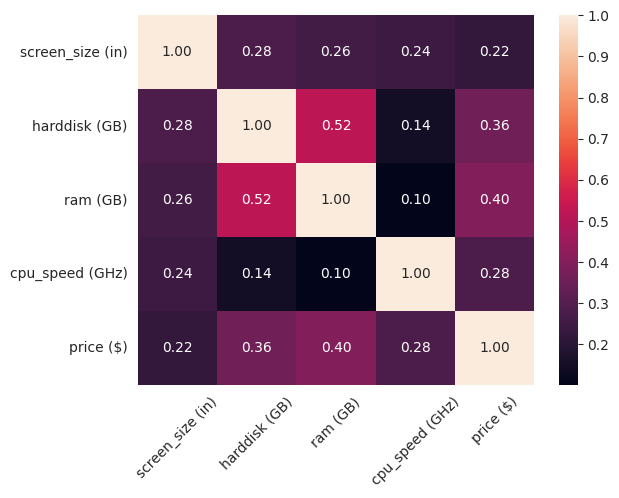

In [ ]:
fig = sns.heatmap(data.corr(numeric_only=True), annot = True, fmt = ".2f")
fig.set_xticklabels(fig.get_xticklabels(), rotation = 45)
# RAM is strongly positively correlated to harddisk (unsurprising)
# Everything positively correlated with price (unsurprising too!)

#plt.savefig('/content/drive/MyDrive/UNI/Computer Science/COMP2271 Data Science/Data Cleaning and Analysis Coursework/data-heatmap.png', bbox_inches = 'tight')

In [ ]:
# Since RAM and harddisk are strongly positively correlated, might want to explore them both at same time.
# To measure harddisk and RAM together, combine them into one metric: (ram * harddisk) / (ram + harddisk)
data['ram*harddisk/ram+harddisk'] = (data['ram (GB)'] * data['harddisk (GB)']) / (data['ram (GB)'] + data['harddisk (GB)'])

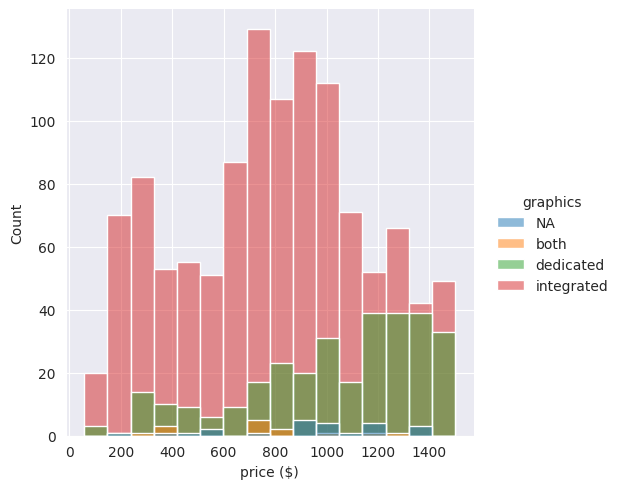

In [ ]:
sns.displot(data = data, x = 'price ($)', hue = 'graphics')

#plt.savefig('/content/drive/MyDrive/UNI/Computer Science/COMP2271 Data Science/Data Cleaning and Analysis Coursework/graphics-by-price-hist.png', bbox_inches = 'tight')

<ipython-input-58-8edf23d341b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_data['count'] = data.groupby('brand')['brand'].transform(pd.Series.count)


Text(0, 0.5, 'Proportion')

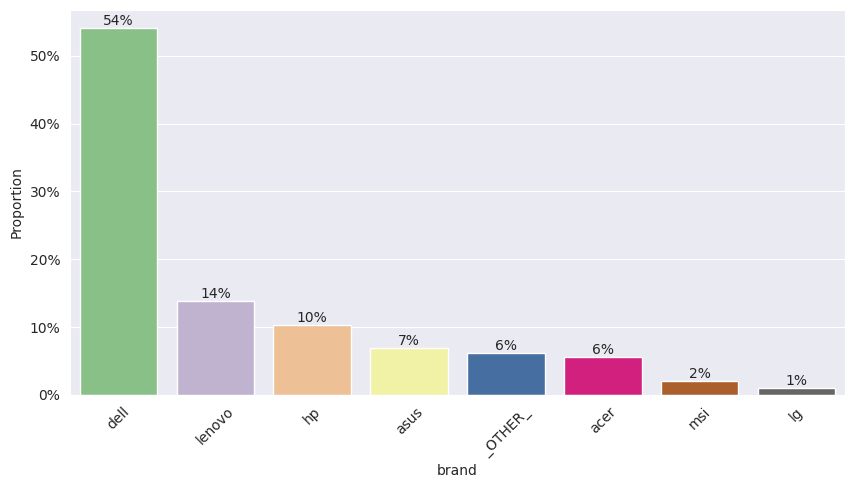

In [ ]:
plt.figure(figsize=(10,5)) # change the size of the figure

# get bars sorted in height order
fig_data = data[:]
fig_data['count'] = data.groupby('brand')['brand'].transform(pd.Series.count)
fig_data = fig_data.sort_values('count', ascending = False)

fig = sns.barplot(data = fig_data, x ='brand', y = 'count', palette = 'Accent', estimator = lambda x: len(x) / len(data['brand']) * 100)
fig.set_xticklabels(fig.get_xticklabels(), rotation = 45)

fig_data = fig_data.drop('count', axis = 1)

# add % to top of bars
for con in fig.containers:
    fig.bar_label(con, fmt = '%.f%%')

fig.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.yaxis.set_label_text('Proportion')

#plt.savefig('/content/drive/MyDrive/UNI/Computer Science/COMP2271 Data Science/Data Cleaning and Analysis Coursework/brand-proportions-bar.png', bbox_inches = 'tight')

**Customer 1** - Site surveyor / works outdoors

In [ ]:
# get laptops meeting minimum requirements for customer 1
customer1 = data[(data['harddisk (GB)'] > 500) &
                 (data['ram (GB)'] > 8) &
                 (data['screen_size (in)'] < 15)]

In [ ]:
customer1_features = customer1[customer1['special_features'].str.contains('water\sresistant|lightweight|anti\sglare', regex = True)]

water_res = customer1_features[customer1_features['special_features'].str.contains('water resistant')]
water_res

,brand,model,screen_size (in),color,harddisk (GB),ram (GB),cpu,cpu_speed (GHz),OS,graphics,graphics_coprocessor,special_features,rating,price ($),ram*harddisk/ram+harddisk
1265,lenovo,thinkpad,14.0,black,512.0,16.0,intel core i7,NaN,windows 10,integrated,NA,water resistant / hd audio / fingerprint reade...,4 stars,1249.0,15.515152


In [ ]:
# Only one laptop has water resistance and anti glare, so add it to recommendations later and remove to avoid adding again
customer1_features.drop(1265, inplace = True)

<ipython-input-61-056bf8148460>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer1_features.drop(1265, inplace = True)


<ipython-input-62-2683696272e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_data['Anti-glare Screen?'] = fig_data['special_features'].apply(lambda x: "Yes" if ('anti glare' in x) else "No")


<BarContainer object of 16 artists>
<BarContainer object of 16 artists>


Text(0, 0.5, 'Number of Laptops')

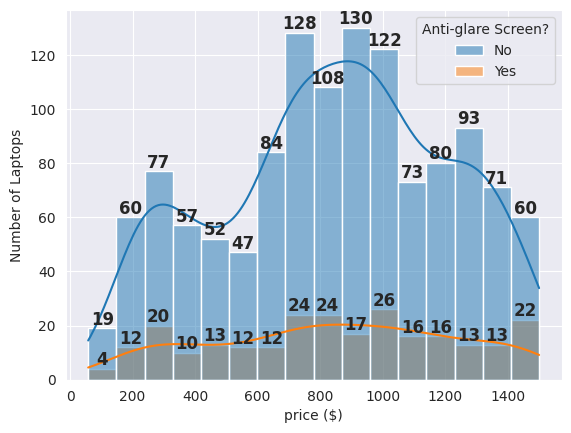

In [ ]:
fig_data = data[:]
fig_data['Anti-glare Screen?'] = fig_data['special_features'].apply(lambda x: "Yes" if ('anti glare' in x) else "No")

fig = sns.histplot(data = fig_data, x = 'price ($)', hue = 'Anti-glare Screen?', kde = True)

# add numbers to top of bars
for con in fig.containers:
  print(con)
  fig.bar_label(con, fmt = '%.0f', fontweight = 'semibold', size = 'large')

fig.yaxis.set_label_text('Number of Laptops')

#plt.savefig('/content/drive/MyDrive/UNI/Computer Science/COMP2271 Data Science/Data Cleaning and Analysis Coursework/price-antiglare-hist.png', bbox_inches = 'tight')

In [ ]:
# want both ram and harddisk, so get highest values in ram*harddisk/ram+harddisk
customer1_features = customer1_features.sort_values('ram*harddisk/ram+harddisk', ascending = False)

# add top 4 to recommendations
customer1_recom = pd.concat([water_res, customer1_features[:4]])

# sort by price before uploading, and remove columns that are entirely NA.
customer1_recom.sort_values('price ($)', inplace = True)
customer1_recom['graphics_coprocessor'].replace('NA', np.nan, inplace = True)
customer1_recom.dropna(how = 'all',axis = 1, inplace= True)
customer1_recom

,brand,model,screen_size (in),color,harddisk (GB),ram (GB),cpu,OS,graphics,special_features,rating,price ($),ram*harddisk/ram+harddisk
963,dell,latitude 5440,14.0,NA,512.0,32.0,intel core i7,windows 11,integrated,anti glare / backlit keyboard,NA,996.99,30.117647
1228,dell,inspiron 14,14.0,platinum silver,2000.0,64.0,intel core i5,windows 11,integrated,hd audio / anti glare / backlit keyboard / fin...,NA,1209.99,62.015504
1265,lenovo,thinkpad,14.0,black,512.0,16.0,intel core i7,windows 10,integrated,water resistant / hd audio / fingerprint reade...,4 stars,1249.00,15.515152
1399,dell,vostro,14.0,NA,2000.0,64.0,intel core i5,windows 11,integrated,anti glare,3 stars,1381.99,62.015504
1429,dell,5000,14.0,platinum silver,2000.0,64.0,intel core i7,windows 11,dedicated,hd audio / anti glare / backlit keyboard / fin...,NA,1406.04,62.015504


In [ ]:
# Save customer 2 recom to external spreadsheet
customer1_recom.to_excel('/content/drive/MyDrive/UNI/Computer Science/COMP2271 Data Science/Data Cleaning and Analysis Coursework/customer1_recom.xlsx', index = False)

**Customer 2** - Animator

In [ ]:
# get laptops meeting minimum requirements for customer 1
customer2 = data[(data['screen_size (in)'] >= 15) &
                 (data['ram (GB)'] >= 16)]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


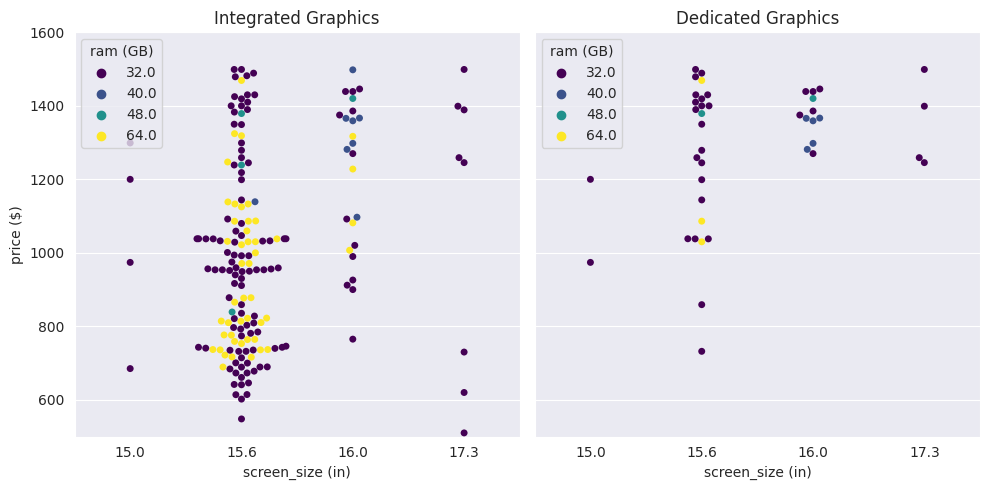

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.swarmplot(data = customer2[(customer2['ram (GB)'] >= 32)], x = 'screen_size (in)', y = 'price ($)', hue = 'ram (GB)', palette = 'viridis', ax = axs[0])
sns.swarmplot(data = customer2[(customer2['ram (GB)'] >= 32) & (customer2['graphics'].str.contains('dedicated'))], x = 'screen_size (in)', y = 'price ($)', hue = 'ram (GB)', palette = 'viridis', ax = axs[1])

axs[0].title.set_text('Integrated Graphics')
axs[0].set_ylim(500, 1600)
axs[0].legend(loc = 'upper left', title = 'ram (GB)')

axs[1].title.set_text('Dedicated Graphics')
axs[1].set_ylabel('')
axs[1].set_yticklabels('')
axs[1].set_ylim(500, 1600)

f.tight_layout()
#plt.savefig('/content/drive/MyDrive/UNI/Computer Science/COMP2271 Data Science/Data Cleaning and Analysis Coursework/screensize-price-wrtRAM-swarmplot.png', bbox_inches = 'tight')

In [ ]:
# laptops with 64GB ram
cheapest_64ram_int = customer2[customer2['ram (GB)']==64].sort_values('price ($)')[:1]
cheapest_64ram_ded = customer2[(customer2['ram (GB)']==64) & (customer2['graphics'] == 'dedicated')].sort_values('price ($)')[:1]

In [ ]:
customer2_copro = customer2[(customer2['graphics'].str.contains('dedicated|both', regex = True)) &
                            (customer2['graphics_coprocessor'] != 'NA')]

# 32 gb preferable
customer2_copro = customer2_copro[customer2_copro['ram (GB)'] >= 32]
customer2_copro.sort_values('price ($)', inplace = True)

# cheapest option here is a great value one
greatvalue_customer2 = customer2_copro[:1]
greatvalue_customer2

,brand,model,screen_size (in),color,harddisk (GB),ram (GB),cpu,cpu_speed (GHz),OS,graphics,graphics_coprocessor,special_features,rating,price ($),ram*harddisk/ram+harddisk
561,hp,pavilion,15.6,horizon blue,1000.0,32.0,amd ryzen 7,NaN,windows 11,dedicated,amd radeon graphics,NA,4 stars,732.0,31.007752


In [ ]:
# get recommendations
customer2_copro.sort_values('screen_size (in)', ascending = False, inplace = True)
customer2_copro_recom = customer2_copro[:1]

<ipython-input-70-d769bbb3e0f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_data['graphics'] = fig_data['graphics'].cat.remove_unused_categories()
<ipython-input-70-d769bbb3e0f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_data['stylus'] = fig_data['special_features'].apply(lambda x: "Includes stylus" if ('stylus' in x) else "No stylus")


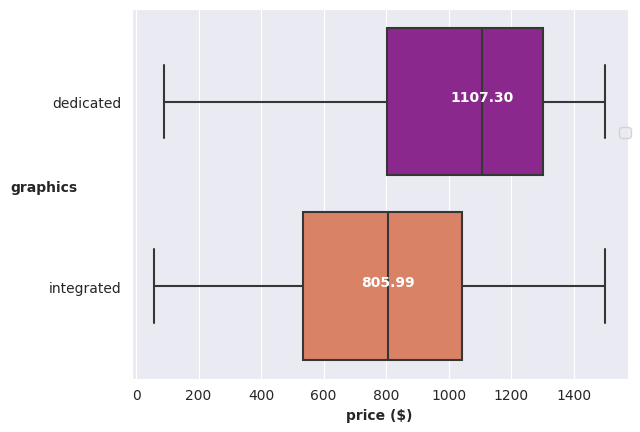

In [ ]:
fig_data = data[data['graphics'].str.contains(r'dedicated|integrated', regex = True)]
fig_data['graphics'] = fig_data['graphics'].cat.remove_unused_categories()
fig_data['stylus'] = fig_data['special_features'].apply(lambda x: "Includes stylus" if ('stylus' in x) else "No stylus")

fig = sns.boxplot(data = fig_data, x = 'price ($)', y = 'graphics', palette = 'plasma')

fig.set_ylabel(fig.get_ylabel(), rotation = 0, fontweight = 'semibold')
fig.set_xlabel(fig.get_xlabel(), fontweight = 'semibold')

# mark medians on boxes (adapted from https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value)
lines = fig.get_lines() # get all the lines on the boxplot
boxes = [child for child in fig.get_children() if "Patch" in str(child)] # identify the boxes in the figs children
box_len = len(lines) // len(boxes) # find length of each box
for median_line in lines[4::box_len]: # get middle line in each box by starting at line 4 (first median) then stepping to each other median
    x, y = (data.mean() for data in median_line.get_data()) # x, y are middle of median line's coords in graph
    txt = fig.text(x, y, f'{x:{".2f"}}', # round each value to 2dp because it is a price
                    ha = 'center', fontweight = 'semibold', color = 'white')

plt.legend(bbox_to_anchor = (1.02, 0.7))
#plt.savefig('/content/drive/MyDrive/UNI/Computer Science/COMP2271 Data Science/Data Cleaning and Analysis Coursework/graphics-price-boxplot.png', bbox_inches = 'tight')

In [ ]:
customer2_stylus = customer2[customer2['special_features'].str.contains('stylus', regex = True)]

# choose which to recommend
customer2_stylus.sort_values('screen_size (in)', ascending = False, inplace = True)
customer2_stylus_recom = customer2_stylus[:1]

<ipython-input-71-570ed1d6aed9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer2_stylus.sort_values('screen_size (in)', ascending = False, inplace = True)


In [ ]:
# combine to create recommendations for customer 2
customer2_recom = pd.concat([customer2_copro_recom, customer2_stylus_recom, greatvalue_customer2, cheapest_64ram_int, cheapest_64ram_ded])
customer2_recom.sort_values('price ($)', inplace = True)
customer2_recom.dropna(how = 'all', inplace = True, axis = 1)
customer2_recom

,brand,model,screen_size (in),color,harddisk (GB),ram (GB),cpu,OS,graphics,graphics_coprocessor,special_features,rating,price ($),ram*harddisk/ram+harddisk
481,dell,inspiron 3511,15.6,black,256.0,64.0,intel core i5,windows 10,integrated,NA,bluetooth / wifi,NA,689.33,51.200000
561,hp,pavilion,15.6,horizon blue,1000.0,32.0,amd ryzen 7,windows 11,dedicated,amd radeon graphics,NA,4 stars,732.00,31.007752
1020,msi,gf63 thin 10scxr,15.6,black,2000.0,64.0,intel core i5,windows 10,dedicated,NA,backlit keyboard / anti glare / hd audio,NA,1029.99,62.015504
1115,dell,inspiron 7000,16.0,platinum silver,512.0,16.0,intel core i5,windows 10,integrated,NA,hd audio / backlit keyboard / stylus / fingerp...,NA,1099.99,15.515152
1259,dell,precision 7000,17.3,grey,512.0,32.0,intel core i7,windows 10,dedicated,rtx a3000,anti glare screen,NA,1245.49,30.117647


In [ ]:
# Save customer 2 recom to external spreadsheet
customer2_recom.to_excel('/content/drive/MyDrive/UNI/Computer Science/COMP2271 Data Science/Data Cleaning and Analysis Coursework/customer2_recom.xlsx', index = False)